In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv("master_dataset/merged_news.csv")

data.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [21]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')  # If they are improper dates, it will be NAT (Not a time)


In [22]:
na_date_rows = data[data['date'].isna()]

print(na_date_rows['date']) # 10 rows do not have a published date.

9358    NaT
15507   NaT
15508   NaT
15839   NaT
15840   NaT
17432   NaT
17433   NaT
18933   NaT
21869   NaT
21870   NaT
Name: date, dtype: datetime64[ns]


In [23]:
data = data.dropna()

In [24]:
# Create separate columns for date, month, year, and day of the week
data['date_ofmonth'] = data['date'].dt.strftime('%d')
data['month'] = data['date'].dt.strftime('%m')
data['year'] = data['date'].dt.strftime('%Y')
data['day_of_week'] = data['date'].dt.strftime('%A')
data['year_month'] = data['date'].dt.to_period('M')

# Print the updated DataFrame
print(data.head())

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject       date  \
0  Donald Trump just couldn t wish all Americans ...    News 2017-12-31   
1  House Intelligence Committee Chairman Devin Nu...    News 2017-12-31   
2  On Friday, it was revealed that former Milwauk...    News 2017-12-30   
3  On Christmas day, Donald Trump announced that ...    News 2017-12-29   
4  Pope Francis used his annual Christmas Day mes...    News 2017-12-25   

   class date_ofmonth month  year day_of_week year_month  
0      1           31    12  2017      Sunday    2017-12  
1      1           31    12  2017      Sunday    2017-12  
2      1           30    12  2017  

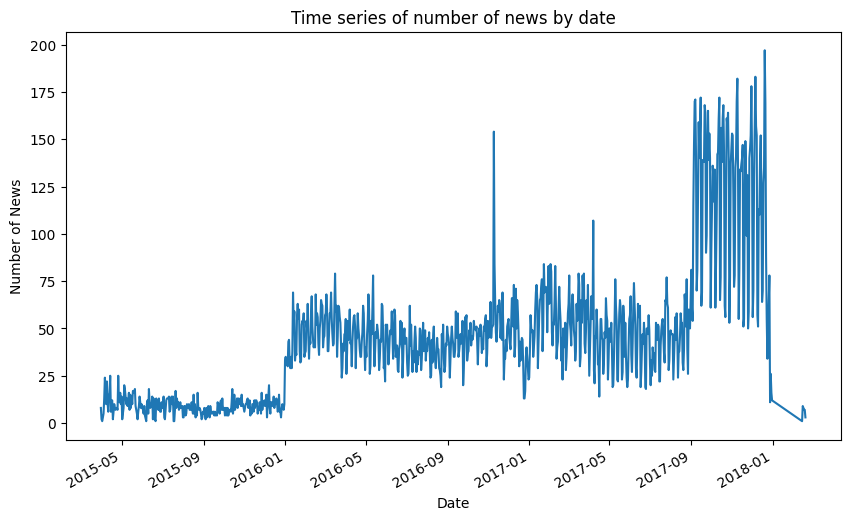

In [25]:
import matplotlib.pyplot as plt

# Group the DataFrame by date and count the number of news on each date
plt_by_date = data.groupby('date').size()

# Plot the time series of the number of news by date
plt_by_date.plot(figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Number of News')
plt.title('Time series of number of news by date')
plt.show()

<Axes: >

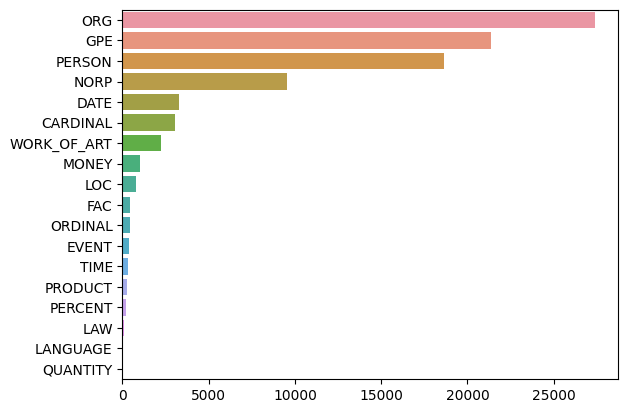

In [26]:
#Here we perform NER analysis to see if there are any interesting traits found in the article samples.
import spacy
import collections

nlp = spacy.load("en_core_web_sm")

def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

#we can see which entities are the most common among titles in the dataset for both real and fake news.
ent=data['title'].apply(lambda x : ner(x))
ent=[x for sub in ent for x in sub]
counter=collections.Counter(ent)
count=counter.most_common()
x,y=map(list,zip(*count))
sns.barplot(x=y,y=x)

<Axes: >

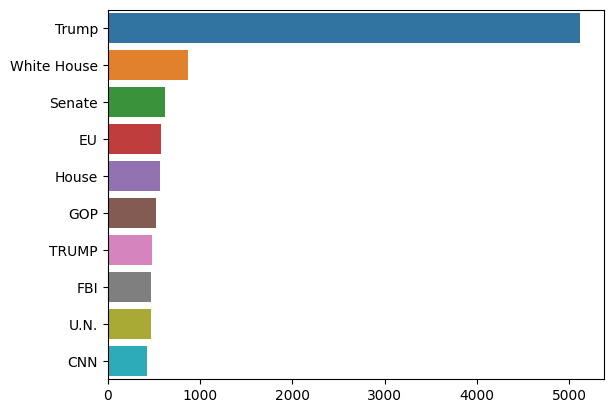

In [28]:
#we can also visualize the some of the most common companies, institutions that shows up in these article titles. 
#It seems that some of the words are the same but the only difference was the capitalization. Despite that, there might be value in retaining the capitalization of words as it may be useful in analyzing
#subjective opinions or bias in the articles.

def ner(text,ent="ORG"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

org = data['title'].apply(lambda x: ner(x))
org = [i for x in org for i in x]
counter = collections.Counter(org)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(x= y,y = x)

<Axes: >

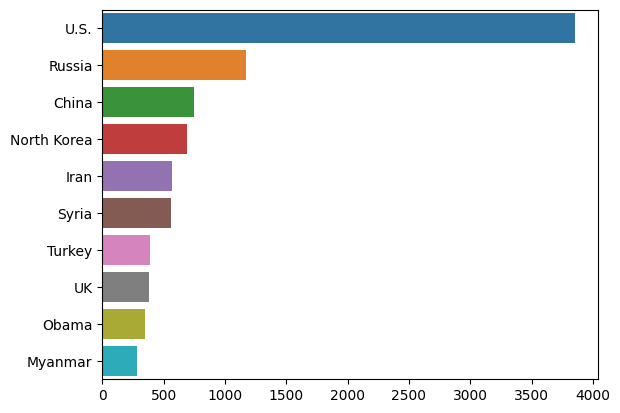

In [29]:
#visualize most common geographic locations based on the article titles.
def ner(text,ent="GPE"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

gpe = data['title'].apply(lambda x: ner(x))
gpe = [i for x in gpe for i in x]
counter = collections.Counter(gpe)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(x= y,y = x)

<Axes: >

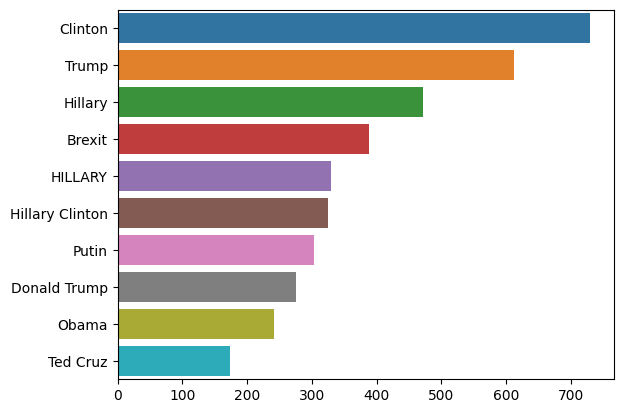

In [30]:
#visualize the most popular person entity based on the article titles. In particular, it seems that Brexit was misclassified as a person in the dataset and this is something we might have to take note of.
def ner(text,ent="PERSON"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

person = data['title'].apply(lambda x: ner(x))
person = [i for x in person for i in x]
counter = collections.Counter(person)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(x= y,y = x)